In [1]:
import torch
from torch import optim
from tqdm import tqdm

import numpy as np
import copy
import json

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
USE_CUDA = True
use_device = torch.device('cuda' if USE_CUDA else 'cpu')

# load model會是空的

In [2]:
from data_util import Schema

root = '/notebooks/sinica/dataset/'

schema_root = root+'schema_mr5.txt'
relation_data = root+'skincare_mr5.train'
dev_data = root+'skincare_mr5.dev'
test_data = root+'skincare_mr5.test'


schema = Schema(schema_root)
# schema.rel2ix
# {'ApplyIn': 4,'ApplyTo': 2, 'ApprovedOf': 6, 'Feel': 3, 'Rel-None': 1, 'Rel-Pad': 0, 'Relieve': 5}

In [3]:
# ========hyper-parameter-set==========
MAX_LEN = 100
BATCH_SIZE = 32

EMBEDDING_DIM = 128
HIDDEN_DIM1 = 100  #30
HIDDEN_DIM2 =  100 #16
LABEL_EMBED_DIM = 100 #8

ATTN_OUT = 100 #8

n_iter = 100
rel_be_filtered=None
# rel_be_filtered=['Relieve']

In [4]:
from data_util import BIOLoader

loader = BIOLoader(relation_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                   shuffle=True, device=use_device)
dev_loader = BIOLoader(dev_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                       word_to_ix=loader.word_to_ix, device=use_device)

In [5]:
from models import JointERE


param_list = [loader.vocab_size, EMBEDDING_DIM, HIDDEN_DIM1, HIDDEN_DIM2, LABEL_EMBED_DIM,
             ATTN_OUT, schema]


model = JointERE(*param_list).to(use_device)
model.fit(loader, dev_loader, n_iter=n_iter)


  1%|          | 1/100 [00:27<46:11, 28.00s/it]

epoch: 1 | ent loss 0.0898 | rel loss 0.0067 | total loss 0.0966
         | val ent loss 0.1518 | val rel loss 0.0122


  2%|▏         | 2/100 [00:55<45:08, 27.64s/it]

epoch: 2 | ent loss 0.0972 | rel loss 0.0046 | total loss 0.1017
         | val ent loss 0.0581 | val rel loss 0.0011


  3%|▎         | 3/100 [01:21<43:58, 27.20s/it]

epoch: 3 | ent loss 0.0532 | rel loss 0.0035 | total loss 0.0567
         | val ent loss 0.0913 | val rel loss 0.0025


  4%|▍         | 4/100 [01:46<42:46, 26.73s/it]

epoch: 4 | ent loss 0.0663 | rel loss 0.0052 | total loss 0.0715
         | val ent loss 0.1032 | val rel loss 0.0013


  5%|▌         | 5/100 [02:11<41:46, 26.38s/it]

epoch: 5 | ent loss 0.0784 | rel loss 0.0050 | total loss 0.0834
         | val ent loss 0.0559 | val rel loss 0.0028


  6%|▌         | 6/100 [02:37<41:05, 26.23s/it]

epoch: 6 | ent loss 0.1047 | rel loss 0.0054 | total loss 0.1101
         | val ent loss 0.0657 | val rel loss 0.0010


  7%|▋         | 7/100 [03:02<40:22, 26.04s/it]

epoch: 7 | ent loss 0.0471 | rel loss 0.0035 | total loss 0.0506
         | val ent loss 0.0306 | val rel loss 0.0009


  8%|▊         | 8/100 [03:27<39:49, 25.97s/it]

epoch: 8 | ent loss 0.0816 | rel loss 0.0030 | total loss 0.0847
         | val ent loss 0.0318 | val rel loss 0.0005


  9%|▉         | 9/100 [03:52<39:13, 25.86s/it]

epoch: 9 | ent loss 0.0383 | rel loss 0.0032 | total loss 0.0415
         | val ent loss 0.0372 | val rel loss 0.0010


 10%|█         | 10/100 [04:17<38:36, 25.74s/it]

epoch: 10 | ent loss 0.0744 | rel loss 0.0037 | total loss 0.0781
          | val ent loss 0.0334 | val rel loss 0.0008


 11%|█         | 11/100 [04:41<37:58, 25.60s/it]

epoch: 11 | ent loss 0.0582 | rel loss 0.0039 | total loss 0.0621
          | val ent loss 0.0154 | val rel loss 0.0004


 12%|█▏        | 12/100 [05:07<37:33, 25.61s/it]

epoch: 12 | ent loss 0.0339 | rel loss 0.0059 | total loss 0.0398
          | val ent loss 0.0579 | val rel loss 0.0012


 13%|█▎        | 13/100 [05:31<37:00, 25.52s/it]

epoch: 13 | ent loss 0.0464 | rel loss 0.0036 | total loss 0.0501
          | val ent loss 0.0132 | val rel loss 0.0011


 14%|█▍        | 14/100 [05:56<36:28, 25.45s/it]

epoch: 14 | ent loss 0.0399 | rel loss 0.0040 | total loss 0.0439
          | val ent loss 0.0494 | val rel loss 0.0007


 15%|█▌        | 15/100 [06:20<35:58, 25.39s/it]

epoch: 15 | ent loss 0.0508 | rel loss 0.0039 | total loss 0.0547
          | val ent loss 0.0217 | val rel loss 0.0006


 16%|█▌        | 16/100 [06:46<35:33, 25.39s/it]

epoch: 16 | ent loss 0.0788 | rel loss 0.0059 | total loss 0.0847
          | val ent loss 0.0187 | val rel loss 0.0005


 17%|█▋        | 17/100 [07:11<35:04, 25.36s/it]

epoch: 17 | ent loss 0.0656 | rel loss 0.0024 | total loss 0.0680
          | val ent loss 0.0367 | val rel loss 0.0009


 18%|█▊        | 18/100 [07:36<34:40, 25.37s/it]

epoch: 18 | ent loss 0.0408 | rel loss 0.0048 | total loss 0.0455
          | val ent loss 0.0164 | val rel loss 0.0006


 19%|█▉        | 19/100 [08:01<34:11, 25.33s/it]

epoch: 19 | ent loss 0.0315 | rel loss 0.0032 | total loss 0.0347
          | val ent loss 0.0233 | val rel loss 0.0004


 20%|██        | 20/100 [08:25<33:40, 25.26s/it]

epoch: 20 | ent loss 0.0332 | rel loss 0.0038 | total loss 0.0371
          | val ent loss 0.0421 | val rel loss 0.0016


 21%|██        | 21/100 [08:48<33:07, 25.16s/it]

epoch: 21 | ent loss 0.0370 | rel loss 0.0039 | total loss 0.0410
          | val ent loss 0.0108 | val rel loss 0.0005


 22%|██▏       | 22/100 [09:11<32:35, 25.07s/it]

epoch: 22 | ent loss 0.0243 | rel loss 0.0030 | total loss 0.0273
          | val ent loss 0.0124 | val rel loss 0.0009


 23%|██▎       | 23/100 [09:35<32:05, 25.00s/it]

epoch: 23 | ent loss 0.0271 | rel loss 0.0043 | total loss 0.0314
          | val ent loss 0.0260 | val rel loss 0.0015


 24%|██▍       | 24/100 [09:59<31:38, 24.99s/it]

epoch: 24 | ent loss 0.0493 | rel loss 0.0034 | total loss 0.0527
          | val ent loss 0.0198 | val rel loss 0.0007


 25%|██▌       | 25/100 [10:23<31:11, 24.96s/it]

epoch: 25 | ent loss 0.0188 | rel loss 0.0040 | total loss 0.0228
          | val ent loss 0.0611 | val rel loss 0.0017


 26%|██▌       | 26/100 [10:49<30:49, 25.00s/it]

epoch: 26 | ent loss 0.0216 | rel loss 0.0034 | total loss 0.0250
          | val ent loss 0.0310 | val rel loss 0.0014


 27%|██▋       | 27/100 [11:15<30:26, 25.03s/it]

epoch: 27 | ent loss 0.0321 | rel loss 0.0043 | total loss 0.0364
          | val ent loss 0.0504 | val rel loss 0.0020


 28%|██▊       | 28/100 [11:41<30:03, 25.05s/it]

epoch: 28 | ent loss 0.0422 | rel loss 0.0023 | total loss 0.0445
          | val ent loss 0.0501 | val rel loss 0.0007


 29%|██▉       | 29/100 [12:06<29:39, 25.07s/it]

epoch: 29 | ent loss 0.0380 | rel loss 0.0047 | total loss 0.0427
          | val ent loss 0.1048 | val rel loss 0.0015


 30%|███       | 30/100 [12:33<29:17, 25.10s/it]

epoch: 30 | ent loss 0.0457 | rel loss 0.0032 | total loss 0.0489
          | val ent loss 0.1318 | val rel loss 0.0019


 31%|███       | 31/100 [12:58<28:53, 25.12s/it]

epoch: 31 | ent loss 0.0215 | rel loss 0.0030 | total loss 0.0245
          | val ent loss 0.0456 | val rel loss 0.0009


 32%|███▏      | 32/100 [13:24<28:30, 25.15s/it]

epoch: 32 | ent loss 0.0329 | rel loss 0.0024 | total loss 0.0354
          | val ent loss 0.0118 | val rel loss 0.0003


 33%|███▎      | 33/100 [13:51<28:07, 25.19s/it]

epoch: 33 | ent loss 0.0323 | rel loss 0.0032 | total loss 0.0355
          | val ent loss 0.0059 | val rel loss 0.0003


 34%|███▍      | 34/100 [14:17<27:44, 25.21s/it]

epoch: 34 | ent loss 0.0298 | rel loss 0.0031 | total loss 0.0330
          | val ent loss 0.0911 | val rel loss 0.0013


 35%|███▌      | 35/100 [14:42<27:18, 25.21s/it]

epoch: 35 | ent loss 0.0292 | rel loss 0.0029 | total loss 0.0321
          | val ent loss 0.0261 | val rel loss 0.0011


 36%|███▌      | 36/100 [15:07<26:53, 25.21s/it]

epoch: 36 | ent loss 0.0236 | rel loss 0.0035 | total loss 0.0270
          | val ent loss 0.0216 | val rel loss 0.0003


 37%|███▋      | 37/100 [15:32<26:28, 25.21s/it]

epoch: 37 | ent loss 0.0174 | rel loss 0.0038 | total loss 0.0212
          | val ent loss 0.0162 | val rel loss 0.0004


 38%|███▊      | 38/100 [15:57<26:02, 25.20s/it]

epoch: 38 | ent loss 0.0413 | rel loss 0.0056 | total loss 0.0469
          | val ent loss 0.0196 | val rel loss 0.0003


 39%|███▉      | 39/100 [16:22<25:37, 25.20s/it]

epoch: 39 | ent loss 0.0424 | rel loss 0.0029 | total loss 0.0453
          | val ent loss 0.0255 | val rel loss 0.0008


 40%|████      | 40/100 [16:48<25:12, 25.21s/it]

epoch: 40 | ent loss 0.0316 | rel loss 0.0036 | total loss 0.0352
          | val ent loss 0.0109 | val rel loss 0.0006


 41%|████      | 41/100 [17:14<24:48, 25.22s/it]

epoch: 41 | ent loss 0.0143 | rel loss 0.0027 | total loss 0.0170
          | val ent loss 0.0096 | val rel loss 0.0006


 42%|████▏     | 42/100 [17:39<24:23, 25.23s/it]

epoch: 42 | ent loss 0.0150 | rel loss 0.0038 | total loss 0.0189
          | val ent loss 0.0048 | val rel loss 0.0004


 43%|████▎     | 43/100 [18:03<23:56, 25.21s/it]

epoch: 43 | ent loss 0.0128 | rel loss 0.0044 | total loss 0.0172
          | val ent loss 0.0520 | val rel loss 0.0005


 44%|████▍     | 44/100 [18:28<23:30, 25.19s/it]

epoch: 44 | ent loss 0.0268 | rel loss 0.0047 | total loss 0.0315
          | val ent loss 0.0190 | val rel loss 0.0015


 45%|████▌     | 45/100 [18:52<23:04, 25.17s/it]

epoch: 45 | ent loss 0.0538 | rel loss 0.0031 | total loss 0.0569
          | val ent loss 0.0376 | val rel loss 0.0006


 46%|████▌     | 46/100 [19:17<22:39, 25.17s/it]

epoch: 46 | ent loss 0.0203 | rel loss 0.0030 | total loss 0.0234
          | val ent loss 0.0208 | val rel loss 0.0009


 47%|████▋     | 47/100 [19:42<22:13, 25.15s/it]

epoch: 47 | ent loss 0.0152 | rel loss 0.0045 | total loss 0.0197
          | val ent loss 0.0124 | val rel loss 0.0012


 48%|████▊     | 48/100 [20:08<21:48, 25.17s/it]

epoch: 48 | ent loss 0.0222 | rel loss 0.0032 | total loss 0.0254
          | val ent loss 0.0545 | val rel loss 0.0004


 49%|████▉     | 49/100 [20:34<21:24, 25.19s/it]

epoch: 49 | ent loss 0.0476 | rel loss 0.0027 | total loss 0.0503
          | val ent loss 0.0236 | val rel loss 0.0009


 50%|█████     | 50/100 [20:59<20:59, 25.19s/it]

epoch: 50 | ent loss 0.0239 | rel loss 0.0025 | total loss 0.0264
          | val ent loss 0.0112 | val rel loss 0.0004


 51%|█████     | 51/100 [21:25<20:35, 25.21s/it]

epoch: 51 | ent loss 0.0383 | rel loss 0.0037 | total loss 0.0421
          | val ent loss 0.0256 | val rel loss 0.0003


 52%|█████▏    | 52/100 [21:51<20:10, 25.23s/it]

epoch: 52 | ent loss 0.0300 | rel loss 0.0030 | total loss 0.0330
          | val ent loss 0.0063 | val rel loss 0.0003


 53%|█████▎    | 53/100 [22:16<19:44, 25.21s/it]

epoch: 53 | ent loss 0.0157 | rel loss 0.0029 | total loss 0.0186
          | val ent loss 0.0132 | val rel loss 0.0007


 54%|█████▍    | 54/100 [22:40<19:19, 25.20s/it]

epoch: 54 | ent loss 0.0221 | rel loss 0.0040 | total loss 0.0262
          | val ent loss 0.0244 | val rel loss 0.0006


 55%|█████▌    | 55/100 [23:06<18:54, 25.21s/it]

epoch: 55 | ent loss 0.0502 | rel loss 0.0033 | total loss 0.0534
          | val ent loss 0.0145 | val rel loss 0.0006


 56%|█████▌    | 56/100 [23:32<18:29, 25.22s/it]

epoch: 56 | ent loss 0.0117 | rel loss 0.0037 | total loss 0.0154
          | val ent loss 0.0039 | val rel loss 0.0003


 57%|█████▋    | 57/100 [23:56<18:03, 25.20s/it]

epoch: 57 | ent loss 0.0263 | rel loss 0.0030 | total loss 0.0293
          | val ent loss 0.0309 | val rel loss 0.0004


 58%|█████▊    | 58/100 [24:21<17:37, 25.19s/it]

epoch: 58 | ent loss 0.0189 | rel loss 0.0026 | total loss 0.0215
          | val ent loss 0.0146 | val rel loss 0.0005


 59%|█████▉    | 59/100 [24:44<17:11, 25.16s/it]

epoch: 59 | ent loss 0.0137 | rel loss 0.0036 | total loss 0.0172
          | val ent loss 0.0075 | val rel loss 0.0005


 60%|██████    | 60/100 [25:09<16:46, 25.16s/it]

epoch: 60 | ent loss 0.0199 | rel loss 0.0032 | total loss 0.0231
          | val ent loss 0.0145 | val rel loss 0.0004


 61%|██████    | 61/100 [25:34<16:21, 25.16s/it]

epoch: 61 | ent loss 0.0127 | rel loss 0.0027 | total loss 0.0154
          | val ent loss 0.0123 | val rel loss 0.0006


 62%|██████▏   | 62/100 [26:00<15:56, 25.17s/it]

epoch: 62 | ent loss 0.0268 | rel loss 0.0037 | total loss 0.0306
          | val ent loss 0.0172 | val rel loss 0.0016


 63%|██████▎   | 63/100 [26:25<15:31, 25.17s/it]

epoch: 63 | ent loss 0.0175 | rel loss 0.0028 | total loss 0.0203
          | val ent loss 0.0095 | val rel loss 0.0004


 64%|██████▍   | 64/100 [26:50<15:05, 25.17s/it]

epoch: 64 | ent loss 0.0286 | rel loss 0.0044 | total loss 0.0329
          | val ent loss 0.0116 | val rel loss 0.0008


 65%|██████▌   | 65/100 [27:16<14:41, 25.17s/it]

epoch: 65 | ent loss 0.0227 | rel loss 0.0024 | total loss 0.0251
          | val ent loss 0.0111 | val rel loss 0.0003


 66%|██████▌   | 66/100 [27:41<14:15, 25.17s/it]

epoch: 66 | ent loss 0.0409 | rel loss 0.0043 | total loss 0.0452
          | val ent loss 0.0104 | val rel loss 0.0005


 67%|██████▋   | 67/100 [28:06<13:50, 25.17s/it]

epoch: 67 | ent loss 0.0596 | rel loss 0.0026 | total loss 0.0622
          | val ent loss 0.0057 | val rel loss 0.0002


 68%|██████▊   | 68/100 [28:31<13:25, 25.17s/it]

epoch: 68 | ent loss 0.0270 | rel loss 0.0042 | total loss 0.0312
          | val ent loss 0.0402 | val rel loss 0.0005


 69%|██████▉   | 69/100 [28:57<13:00, 25.18s/it]

epoch: 69 | ent loss 0.0212 | rel loss 0.0031 | total loss 0.0242
          | val ent loss 0.0027 | val rel loss 0.0005


 70%|███████   | 70/100 [29:22<12:35, 25.18s/it]

epoch: 70 | ent loss 0.0227 | rel loss 0.0043 | total loss 0.0270
          | val ent loss 0.0359 | val rel loss 0.0007


 71%|███████   | 71/100 [29:47<12:10, 25.18s/it]

epoch: 71 | ent loss 0.0196 | rel loss 0.0039 | total loss 0.0235
          | val ent loss 0.0035 | val rel loss 0.0005


 72%|███████▏  | 72/100 [30:12<11:44, 25.18s/it]

epoch: 72 | ent loss 0.0348 | rel loss 0.0017 | total loss 0.0364
          | val ent loss 0.0030 | val rel loss 0.0004


 73%|███████▎  | 73/100 [30:38<11:20, 25.19s/it]

epoch: 73 | ent loss 0.0128 | rel loss 0.0025 | total loss 0.0153
          | val ent loss 0.0275 | val rel loss 0.0004


 74%|███████▍  | 74/100 [31:04<10:55, 25.20s/it]

epoch: 74 | ent loss 0.0223 | rel loss 0.0025 | total loss 0.0248
          | val ent loss 0.0164 | val rel loss 0.0008


 75%|███████▌  | 75/100 [31:30<10:30, 25.21s/it]

epoch: 75 | ent loss 0.0115 | rel loss 0.0028 | total loss 0.0143
          | val ent loss 0.0070 | val rel loss 0.0007


 76%|███████▌  | 76/100 [31:57<10:05, 25.22s/it]

epoch: 76 | ent loss 0.0467 | rel loss 0.0023 | total loss 0.0490
          | val ent loss 0.0063 | val rel loss 0.0006


 77%|███████▋  | 77/100 [32:23<09:40, 25.24s/it]

epoch: 77 | ent loss 0.0279 | rel loss 0.0052 | total loss 0.0331
          | val ent loss 0.0029 | val rel loss 0.0005


 78%|███████▊  | 78/100 [32:49<09:15, 25.25s/it]

epoch: 78 | ent loss 0.0166 | rel loss 0.0034 | total loss 0.0200
          | val ent loss 0.0134 | val rel loss 0.0007


 79%|███████▉  | 79/100 [33:15<08:50, 25.26s/it]

epoch: 79 | ent loss 0.0155 | rel loss 0.0022 | total loss 0.0177
          | val ent loss 0.0215 | val rel loss 0.0008


 80%|████████  | 80/100 [33:42<08:25, 25.28s/it]

epoch: 80 | ent loss 0.0231 | rel loss 0.0024 | total loss 0.0255
          | val ent loss 0.0054 | val rel loss 0.0006


 81%|████████  | 81/100 [34:07<08:00, 25.28s/it]

epoch: 81 | ent loss 0.0098 | rel loss 0.0019 | total loss 0.0116
          | val ent loss 0.0042 | val rel loss 0.0004


 82%|████████▏ | 82/100 [34:33<07:35, 25.28s/it]

epoch: 82 | ent loss 0.0051 | rel loss 0.0025 | total loss 0.0076
          | val ent loss 0.0024 | val rel loss 0.0003


 83%|████████▎ | 83/100 [34:58<07:09, 25.29s/it]

epoch: 83 | ent loss 0.0234 | rel loss 0.0027 | total loss 0.0261
          | val ent loss 0.0052 | val rel loss 0.0004


 84%|████████▍ | 84/100 [35:24<06:44, 25.29s/it]

epoch: 84 | ent loss 0.0238 | rel loss 0.0035 | total loss 0.0273
          | val ent loss 0.0142 | val rel loss 0.0004


 85%|████████▌ | 85/100 [35:49<06:19, 25.29s/it]

epoch: 85 | ent loss 0.0312 | rel loss 0.0026 | total loss 0.0338
          | val ent loss 0.0041 | val rel loss 0.0109


 86%|████████▌ | 86/100 [36:15<05:54, 25.29s/it]

epoch: 86 | ent loss 0.0275 | rel loss 0.0032 | total loss 0.0307
          | val ent loss 0.0060 | val rel loss 0.0004


 87%|████████▋ | 87/100 [36:41<05:28, 25.30s/it]

epoch: 87 | ent loss 0.0146 | rel loss 0.0024 | total loss 0.0169
          | val ent loss 0.0116 | val rel loss 0.0003


 88%|████████▊ | 88/100 [37:07<05:03, 25.31s/it]

epoch: 88 | ent loss 0.0240 | rel loss 0.0021 | total loss 0.0261
          | val ent loss 0.0072 | val rel loss 0.0009


 89%|████████▉ | 89/100 [37:33<04:38, 25.32s/it]

epoch: 89 | ent loss 0.0297 | rel loss 0.0037 | total loss 0.0334
          | val ent loss 0.0211 | val rel loss 0.0009


 90%|█████████ | 90/100 [37:59<04:13, 25.32s/it]

epoch: 90 | ent loss 0.0225 | rel loss 0.0034 | total loss 0.0259
          | val ent loss 0.0169 | val rel loss 0.0005


 91%|█████████ | 91/100 [38:25<03:48, 25.33s/it]

epoch: 91 | ent loss 0.0192 | rel loss 0.0035 | total loss 0.0227
          | val ent loss 0.0069 | val rel loss 0.0004


 92%|█████████▏| 92/100 [38:50<03:22, 25.34s/it]

epoch: 92 | ent loss 0.0068 | rel loss 0.0027 | total loss 0.0095
          | val ent loss 0.0047 | val rel loss 0.0003


 93%|█████████▎| 93/100 [39:16<02:57, 25.34s/it]

epoch: 93 | ent loss 0.0142 | rel loss 0.0023 | total loss 0.0166
          | val ent loss 0.0041 | val rel loss 0.0004


 94%|█████████▍| 94/100 [39:42<02:32, 25.35s/it]

epoch: 94 | ent loss 0.0207 | rel loss 0.0037 | total loss 0.0244
          | val ent loss 0.0123 | val rel loss 0.0015


 95%|█████████▌| 95/100 [40:07<02:06, 25.34s/it]

epoch: 95 | ent loss 0.0160 | rel loss 0.0031 | total loss 0.0191
          | val ent loss 0.0115 | val rel loss 0.0005


 96%|█████████▌| 96/100 [40:31<01:41, 25.33s/it]

epoch: 96 | ent loss 0.0105 | rel loss 0.0034 | total loss 0.0139
          | val ent loss 0.0119 | val rel loss 0.0005


 97%|█████████▋| 97/100 [40:56<01:15, 25.32s/it]

epoch: 97 | ent loss 0.0299 | rel loss 0.0034 | total loss 0.0332
          | val ent loss 0.0072 | val rel loss 0.1221


 98%|█████████▊| 98/100 [41:20<00:50, 25.32s/it]

epoch: 98 | ent loss 0.0151 | rel loss 0.0031 | total loss 0.0182
          | val ent loss 0.0046 | val rel loss 0.0006


 99%|█████████▉| 99/100 [41:44<00:25, 25.30s/it]

epoch: 99 | ent loss 0.0120 | rel loss 0.0033 | total loss 0.0153
          | val ent loss 0.0102 | val rel loss 0.0006


100%|██████████| 100/100 [42:09<00:00, 25.29s/it]

epoch: 100 | ent loss 0.0252 | rel loss 0.0042 | total loss 0.0293
           | val ent loss 0.0024 | val rel loss 0.0006


JointERE(
  (bn): BatchNorm1d(100, eps=1e-05, momentum=0.5, affine=False, track_running_stats=True)
  (word_embeds): Embedding(1852, 128)
  (bilstm): GRU(128, 50, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (top_hidden): LSTMCell(200, 100)
  (hidden2tag): Linear(in_features=100, out_features=17, bias=True)
  (softmax): LogSoftmax()
  (label_embed): Linear(in_features=17, out_features=100, bias=False)
  (attn): Attn(
    (w1): Linear(in_features=200, out_features=100, bias=False)
    (w2): Linear(in_features=200, out_features=100, bias=False)
    (tanh): Tanh()
    (v): Linear(in_features=100, out_features=7, bias=False)
    (softmax): LogSoftmax()
  )
)

In [6]:
torch.save(model.state_dict(), 'relation_extraction_1_new.pth')
# model.load_state_dict(torch.load('relation_extraction_1_new.pth'))

In [7]:
# model.fit(loader, dev_loader, n_iter=5)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['使', '用', '此', '款', '美', '髮', '油', '之', '後', ',', '頭', '髮', '觸', '感', '摸', '起', '來', '很', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 2), (12, 13, 5), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
predict
[(2, 3, 2), (12, 13, 5), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
['保', '濕', '商', '品', '一', '向', '是', '我', '最', '最', '注', '重', '的', '臉', '部', '保', '養', '商', '品', '之', '一', ',', '因', '為', '屬', '於', '極', '敏', '感', '性', '且', '偏', '乾', '的', '膚', '質', 

['此', '款', '珂', '潤', '美', '白', '精', '華', '質', '地', '相', '當', '細', '緻', '好', '推', '勻', '.', '延', '展', '性', '很', '好']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', [], [], ['Feel-0-B'], ['Feel-0-B'], [], '', '', '', '', '', '']

True
[(0, 1, 2), (8, 9, 5), (12, 13, 4), (14, 16, 4)]
[((8, 9, 5), (12, 13, 4), 2), ((8, 9, 5), (14, 16, 4), 2)]
predict
[(0, 1, 2), (8, 9, 5), (12, 13, 4), (14, 16, 4)]
[]
['本', '產', '品', '強', '調', '“', '高', '保', '濕', '“', '

['這', '罐', '用', '起', '來', '保', '溼', '力', '感', '覺', '蠻', '好', '的', ',', '後', '續', '的', '妝', '很', '貼', ',', '也', '不', '會', '乾', '到', '脫', '皮']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (5, 6, 3)]
[((0, 1, 2), (5, 6, 3), 3)]
predict
[(0, 1, 2), (5, 6, 3)]
[((0, 1, 2), (5, 6, 3), 3)]
['用', '了', '本', '產', '品', '臉', '上', '的', '保', '濕', 

['待', '在', '冷', '氣', '房', '的', 'O', 'L', '都', '知', '道', '即', '使', '夏', '天', '油', '水', '更', '不', '平', '衡', '所', '以', '臉', '部', '的', '乾', '感', '會', '更', '明', '顯', ',', '油', '感', '也', '會', '更', '凸', '顯', ',', '用', '了', '這', 'S', 'U', 'R', 'P', 'U', 'R', '後', '混', '和', '肌', '的', 'T', '字', '油', '感', '與', '雙', '頰', '乾', '感', '舒', '緩', '很', '多', ',', '滿', '威', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['再', '加', '上', '它', '的', '保', '濕', '效', '果', '很', '讓', '我', '滿', '意', ',', '我', '是', '乾', '性', '肌', '膚', ',', '用', '起', '來', '蠻', '夠', '保', '濕', '的', ',']
['O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', ['ApplyTo-1-B', 'ApplyTo-0-B'], ['ApplyTo-1-B', 'ApplyTo-0-B'], ['ApplyTo-1-B', 'ApplyTo-0-B'], ['ApplyTo-1-B', 'ApplyTo-0-B'], '', '', '', '', '', '', ['ApplyTo-1-A'], ['ApplyTo-1-A'], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', ['ApplyTo-1-B', 'ApplyTo-0-B'], ['ApplyTo-1-B', 'App

['但', '不', '得', '不', '說', ',', '在', '溫', '度', '下', '降', '天', '氣', '轉', '冷', '的', '日', '子', ',', '這', '款', '乳', '霜', '在', '乾', '荒', '肌', '本', '人', '臉', '上', '表', '現', '不', '俗', ',', '洗', '臉', '後', '乾', '繃', '的', '臉', '皮', ',', '噴', '完', '化', '妝', '水', '後', ',', '直', '接', '塗', '抹', '乳', '霜', '按', '壓', '至', '吸', '收', ',', '可', '以', '感', '受', '後', '肌', '膚', '變', '得', '柔', '軟', '滑', '潤', '舒', '適', '好', '摸', ',', '滋', '潤', '度', '佳', ',', '許', '久', '都', '不', '覺', '得', '乾', '癢']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
[''

['但', '是', '只', '要', '在', '睡', '前', '的', '保', '養', '時', '抹', '上', '這', '瓶', ',', '隔', '天', '起', '床', '肌', '膚', '就', '不', '會', '因', '為', '太', '乾', '燥', '而', '出', '油']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

True
[(13, 14, 2), (31, 32, 0)]
[((13, 14, 2), (31, 32, 0), 4)]
predict
[(13, 14, 2), (31, 32, 0)]
[]
['4', '.', '礦', '物', '成',

['這', '次', '試', '用', '的', '是', '【', '肌', '研', '-', '極', '潤', '3', 'D', '多', '效', '緊', '緻', '彈', '力', '復', '元', '凝', '露', '】', '包', '裝', '外', '觀', '是', '我', '個', '人', '很', '愛', '的', '亮', '麗', '的', '桃', '紅', '色', '~', '這', '款', '凝', '露', '是', '強', '調', '1', '瓶', '實', '現', '5', '瓶', '的', '功', '效', '-', '也', '就', '是', '化', '妝', '水', '、', '精', '華', '液', '、', '乳', '液', '、', '乳', '霜', '、', '以', '及', '晚', '安', '面', '膜', '~']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['這', '瓶', '活', '力', '緊', '緻', '1', '5', '奇', '蹟', '霜', 'S', 'P', 'F', '1', '8', '屬', '於', '日', '霜']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['整', '體', '來', '說', '這', '罐', '對', '皺', '紋', '細', '紋', '改', '善', '我', '自', '己', '沒', '有', '特', '別', '的', '感', '覺']
['O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-SYMP', 'I-SYMP', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-SYMP', 'I-SYMP', 'B-SYMP', 'I-SYMP'

[[], '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(12, 13, 2), (14, 15, 3), (55, 56, 0), (78, 79, 2)]
[((12, 13, 2), (14, 15, 3), 3), ((14, 15, 3), (78, 79, 2), 3)]
predict
[(0, 0, 2), (12, 13, 2), (14, 15, 3), (55, 56, 0), (78, 79, 2)]
[]
['這', '款', '粉', '餅', '很', '適', '合', '冬', '天', '使', '用', ',', '這', '幾', '天', '天', '氣', '真', '的', '很', '冷', ',', '一', '整', '天', '下', '來', '肌', '膚', '沒', '有', '出', '現', '乾', '燥', '浮', '粉', ',', '剛', '擦', '時', '看', '的', '出', '粉', '感', ',', '但', '出', '油', '之', '後', '妝', '更', '自', '然', '服', '貼']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['這', '款', '雅', '芳', '新', '活', '科', '技', '抗', '痕', '微', '膠', '囊', '精', '華', '使', '用', '起', '來', '覺', '得', '還', '不', '錯', ',', '感', '覺', '臉', '部', '肌', '膚', '有', '比', '較', '緊', '緻', ',', '細', '紋', '方', '面', '也', '有', '減', '少', '了', '一', '些', ',', '我', '想', '要', '再', '持', '續', '的', '使', '用', '效', '果', '一', '定', '能', '夠', '更', '明', '顯', ',', '有', '了', '這', '瓶', '抗', '痕', '微', '膠', '囊', '精', '華', '讓', '我', '可', '以', '使', '肌', '膚', '越', '來', '越', '年', '輕']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A', 'Relieve-1-A'], ['ApprovedOf

['控', '油', '效', '果', '還', '不', '錯', ',', '但', '因', '為', '還', '沒', '到', '夏', '天', '出', '油', '嚴', '重', '的', '時', '後']
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '']

Predict output
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], [], [], '', '', '', '', '']

True
[(0, 1, 3), (14, 15, 1), (16, 17, 0)]
[]
predict
[(0, 1, 3), (14, 15, 1), (16, 17, 0)]
[((0, 1, 3), (14, 15, 1), 1)]
['但', '是', '我', '是', '覺', '得', '這', '款', '的', '保', '濕', '效', '果', '還', '是', '比', '較', '明', '顯']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[''

['使', '用', '本', '產', '品', '前', '個', '人', '肌', '膚', '混', '合', '肌', '用', '保', '濕', '產', '品', '把', '全', '臉', '保', '養', '到', '油', '水', '平', '衡', 't', '字', '不', '出', '油', '&', '鼻', '頭', '不', '脫', '皮']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 4

['我', '的', '肌', '膚', '屬', '於', '有', '點', '外', '由', '內', '乾', ',', '因', '此', '很', '重', '視', '保', '溼', ',', '這', '瓶', '對', '我', '來', '說', ',', '初', '期', '可', '以', ',', '但', '是', '慢', '慢', '就', '會', '有', '點', '不', '夠', '力', ',', '修', '飾', '方', '面', ',', '不', '是', '很', '理', '想', ',', '最', '主', '要', '是', '我', '需', '要', '的', '遮', '暇', '度', '會', '要', '高', '點']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['總', '結', '就', '是', '.', '我', '覺', '得', '對', '乾', '肌', '來', '說', '.', '.', '保', '濕', '度', '很', '好', '.', '修', '護', '效', '果', '也', '很', '明', '顯', '的', '產', '品', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(9, 10, 6)

['按', '壓', '出', '來', '的', '質', '地', '是', '乳', '白', '色', '的', '乳', '液', '狀', ',', '不', '偏', '濃', '不', '偏', '淡']
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'O']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', [], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'O']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', [], '', '', '']

True
[(5, 6, 5), (12, 14, 4), (18, 18, 4)]
[((5, 6, 5), (12, 14, 4), 2)]
predict
[(5, 6, 5), (12, 14, 4), (18, 18, 4)]
[((5, 6, 5), (12, 14, 4), 2)]
['因', '為', '夏', '天', '一', '直', '使', '用', '美', '白', '產', '品', '的', '我', ',', '在', '步', '入', '秋', '天', '之', '際', ',', '正', '打', '算', '購', '入', '一', '瓶', '抗', '皺', '霜

['此', '款', '精', '華', '液', '強', '調', '舒', '緩', '功', '能', ',', '所', '以', '對', '於', '較', '敏', '感', '膚', '質', '的', '我', '是', '在', '適', '合', '不', '過', '的', ',']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], [], '', '', [], [], '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '', '', '', '', '', '']

True
[(0, 4, 2), (7, 8, 3), (17, 20, 6)]
[((7, 8, 3), (17, 20, 6), 0)]
predic

['我', '最', '後', '一', '道', '保', '養', '品', '是', 'K', 'i', 'e', 'h', 'l', '`', 's', '冰', '河', '醣', '蛋', '白', '保', '溼', '霜', '(', '冬', '天', '偷', '懶', '沒', '擦', '防', '曬', ')']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '']

True
[(25, 26, 1)]
[]
predict
[(25, 26, 1)]
[]
['整', '體', '感', '覺', ':', '對', '我', '而', '言', ',', '冬', '天', '使', '用', '可', '能', '保', '濕', '度', '稍', '不', '足', ',', '誘', '發', '一'

['整', '體', '而', '言', ',', '個', '人', '對', '此', '款', '隔', '離', '霜', '會', '期', '望', '保', '濕', '效', '果', '好', '一', '點', ',', '雖', '它', '的', '質', '感', '真', '的', '狠', '清', '透', ',', '皮', '膚', '不', '會', '感', '到', '負', '擔', ',', '很', '適', '合', '夏', '天', '使', '用']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
['', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

['對', '乾', '性', '肌', '最', '在', '乎', '的', '水', '感', '保', '濕', '來', '說', ',', '也', '算', '表', '現', '不', '錯', ';', '持', '久', '度', '以', '最', '近', '的', '氣', '候', '來', '說', '表', '現', '還', '算', '好', ',', '使', '用', '期', '間', '僅', '有', '額', '頭', '鼻', '翼', '會', '小', '脫', '妝', ',', '但', '這', '樣', '的', '持', '妝', '續', '航', '力', '對', '接', '下', '來', '的', '炎', '熱', '夏', '天', '夠', '不', '夠', ',', '就', '還', '需', '要', '再', '試', '驗', '看', '看']
['O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'],

['這', '款', '修', '飾', '乳', '是', '真', '的', '很', '好', '推', '抹', ',', '且', '抑', '制', '油', '光', '非', '常', '夠', '力', ',', '不', '過', '在', '修', '飾', '方', '面', '就', '略', '顯', '不', '足', ',', '只', '能', '修', '飾', '毛', '孔', ',', '其', '他', '班', '班', '點', '點', '、', '痘', '疤', '、', '痘', '痘', '可', '能', '還', '是', '需', '要', '其', '他', '遮', '瑕', '品', '才', '夠', '力']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '

['它', '使', '用', '完', '後', '很', '保', '濕', ',', '因', '為', '試', '用', '這', '款', '精', '華', '膜', '我', '幾', '乎', '停', '用', '了', '乳', '霜', '也', '沒', '有', '脫', '皮', '的', '困', '擾']
['O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(6, 7, 3), (13, 14, 2)

['•', '保', '濕', '精', '華', ',', '滑', '順', '水', '潤', '觸', '感']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], [], [], [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], [], [], [], []]

True
[(6, 7, 4), (8, 9, 4), (10, 11, 5)]
[]
predict
[(6, 7, 4), (8, 9, 4), (10, 11, 5)]
[]
['這', '瓶', '綠', '色', '包', '裝', ',', '裡', '頭', '有', '添', '加', '和', '漢', '植', '物', '成', '份', ',', '使', '用', '起', '來', '有', '收', '斂', '粗', '大', '毛', '孔', '的', 'F', 'U', ',']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-

['這', '款', '機', '能', '調', '理', '液', '瓶', '身', '還', '滿', '有', '質', '感', '的', '它', '的', '氣', '味', '我', '不', '是', '很', '喜', '歡', '覺', '得', '有', '點', '淡', '淡', '的', '綠', '油', '精', '的', '味', '道', '但', '是', '實', '用', '性', '比', '較', '重', '要', '使', '用', '之', '後', '控', '油', '的', '效', '果', '不', '錯', '而', '且', '又', '不', '會', '讓', '肌', '膚', '乾', '燥', '上', '妝', '後', '也', '比', '較', '不', '會', '浮', '粉', '或', '粉', '刺', '冒', '出', '的', '情', '形', '價', '格', '實', '惠', '整', '體', '而', '言', '是', '不', '錯', '的']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['一', '直', '就', '得', '那', '個', '味', '道', '很', '嗆', '雖', '然', '它', '敷', '起', '來', '冰', '冰', '涼', '涼', '的', '夏', '天', '很', '舒', '服']
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', [], [], '', [], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

True
[(6, 7, 5), (9, 9, 4), (21, 22, 1)]
[((6, 7, 5), (9, 9, 4), 2)]
predict
[(6, 7, 5), (9, 9, 4), (21, 22, 1)]
[]
['重', '點', '是', '很', '擔', '心', '痘', '痘', '臉', '蛋', '適', '不', '適', '合', '用', '這', '款', '美', '容', '油', '嘛', '∼', '∼', '∼']
['O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O

['所', '以', '如', '果', '喜', '歡', '粉', '餅', '系', '的', '水', '水', ',', '或', '是', '容', '易', '出', '油', '的', '人', ',', '這', '款', '真', '的', '不', '錯', ',', '而', '且', '夏', '天', '使', '用', '會', '更', '有', '感', '覺', ',', '因', '為', '它', '有', '控', '油', '的', '效', '果']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-

['延', '展', '性', '佳', ',', '質', '地', '相', '當', '好', '推', '勻']
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B']]

True
[(5, 6, 5), (9, 11, 4)]
[((5, 6, 5), (9, 11, 4), 2)]
predict
[(5, 6, 5), (9, 11, 4)]
[((5, 6, 5), (9, 11, 4), 2)]
['產', '品', '質', '地', '是', '透', '明', '水', '狀', ',']
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

Predict output
['O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '']

True
[(2, 3, 5), (7, 8, 4)]
[((2, 3, 5), (7, 8, 4), 2)]
predi

['這', '款', '水', '潤', '保', '溼', 'B', '.', 'B', '霜', '我', '的', '評', '價', '是', '介', '於', '普', '通', '和', '好', '之', '間', ',']
['B-PROD', 'I-PROD', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (2, 3, 4)]
[]
predict
[(0, 1, 2), (2, 3, 4)]
[]
['真', '期', '待', '夏', '天', '來', '使', '用', '這', '款', '吸', '收', '快', '味', '道', '淡', '雅', '的', '美', '白', '+', '保', '濕', '的', '精', '華', '液']
['O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O',

['這', '款', '產', '品', '不', '含', '酒', '精', ',', '有', '淡', '淡', '的', '花', '香', '味', ',', '對', '於', '我', '這', '種', '有', '些', '泛', '紅', '的', '肌', '膚', '來', '說', '也', '很', '溫', '和', ',', '不', '會', '刺', '激', '敏', '感']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '

['這', '款', '強', '調', '有', '保', '溼', '的', '玻', '尿', '酸', '成', '份']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', [], [], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '']

True
[(0, 1, 2), (5, 6, 3)]
[]
predict
[(0, 1, 2), (5, 6, 3)]
[((0, 1, 2), (5, 6, 3), 3)]
['這', '款', '超', '肌', '能', '緊', '緻', '大', '眼', '霜', ',', '出', '乎', '意', '料', '外', '的', '讓', '人', '驚', '艷']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '

['對', '於', '我', '這', '種', '乾', '性', '肌', '膚', '這', '款', '的', '保', '濕', '度', '真', '的', '很', '不', '錯', '~']
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

True
[(5, 8, 6), (9, 10, 2), (12, 14, 3)]
[]
predict
[(5, 8, 6), (9, 10, 2), (12, 14, 3)]
[]
['面', '膜', '精', '華', '液', '質', '地', '非', '常', '清', '爽', ',', '沒', '有', '明', '顯', '香', '味', ',', '精', '華', '液', '質', '地', '保', '濕', '滑', '順', '容', '易', '吸', '收', ',', '敷', '上', '後', '完', '全', '不', '會', '刺', '激

['按', '摩', '完', '後', '沖', '水', '可', '以', '感', '覺', '的', '到', '此', '款', '洗', '幕', '斯', '有', '保', '濕', '的', '效', '果']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '']

True
[(12, 13, 2), (18, 19, 3)]
[((12, 13, 2), (18, 19, 3), 3)]
predict
[(12, 13, 2), (18, 19, 3)]
[((12, 13, 2), (18, 19, 3), 3)]
['保', '濕', '程', '度', ':', '冬', '天', '使', '用', '夠', '保', '濕', ',', '一', '覺', '到', '天', '亮', '覺', '得', '肌', '膚', '柔', '嫩']
['B-FUNC', 'I-FUNC', 'O', 'O'

['乾', '肌', '我', '本', '人', ',', '在', '化', '妝', '水', '+', '乳', '霜', '晨', '間', '保', '養', '完', '後', ',', '直', '接', '塗', '抹', '這', '瓶', '防', '曬', '乳', '當', '作', '妝', '前', '飾', '底', '乳']
['B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 6), (24, 25, 2)]
[]
predict
[(0, 1, 6), (24, 25, 2)]
[]
['美', '肌', '醫', '生', '這', '瓶', '玻', '尿', 

['這', '款', '粉', '餅', '使', '用', '在', '臉', '上', '感', '覺', '很', '清', '透', ',', '因', '為', '粉', '質', '很', '細', ',', '可', '以', '遮', '住', '毛', '孔', ',', '上', '完', '之', '後', '會', '有', '薄', '薄', '柔', '滑', '的', '觸', '感', ',', '但', '是', '因', '為', '很', '清', '透', '的', '關', '係', ',', '斑', '點', '就', '不', '太', '容', '易', '遮', '起', '來']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['我', '是', '每', '天', '早', '晚', '洗', '完', '臉', '後', ',', '先', '擦', '上', '化', '妝', '水', ',', '再', '使', '用', '這', '瓶', '保', '濕', '乳', '液', ',']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '']

True
[(21, 22, 2)]
[]
predict
[(21, 22, 2)]
[]
['我', '本', '身', '的', '膚', '質', '屬', '於', '敏', '感', '性', '的', ',', '而', '且', '很', '容', '易', '出', '油', '這', '次', '試', '用', '這', '個', '洗', '面', '乳', ',', '整', '體', '上', '還', '滿', '滿', '意', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['冬', '天', '使', '用', '這', '瓶', '剛', '剛', '好', ',', '很', '好', '吸', '收', ',', '保', '溼', '度', '還', '可', '以', ',', '也', '不', '會', '油', '油', '的']
['B-SEAS', 'I-SEAS', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', [], [], '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SEAS', 'I-SEAS', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 1), (4, 5, 2), (15, 16, 3)]
[((0, 1, 1), (15, 16, 3), 1)]
predict
[(0, 1, 1), (4, 5, 2), (15, 16, 3)]
[]
['也', '就', '是', '說', ',', '本', '產', '品', '的', '卸', '除', '力', '很', '強', ',', '用

['臉', '的', '光', '澤', '很', '好', ',', '彈', '力', '也', '不', '錯', ',', '而', '且', '即', '將', '邁', '入', '冬', '季', '的', '氣', '溫', ',', '已', '經', '需', '要', '做', '多', '一', '些', '滋', '潤', '臉', '部', '的', '保', '養', '手', '續']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['混', '合', '性', '膚', '質', '的', '我', '洗', '完', '很', '保', '濕', '清', '爽', '不', '油', '膩']
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], [], [], '', '', '']

Predict output
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], [], [], '', '', '']

True
[(0, 4, 6), (10, 11, 3), (12, 13, 4)]
[((0, 4, 6), (10, 11, 3), 0)]
predict
[(0, 4, 6), (10, 11, 3), (12, 13, 4)]
[((0, 4, 6), (10, 11, 3), 0)]
['不', '會', '像', '有', '些', '精', '華', '液', '保', '濕', '度', '不', '夠', ',', '用', '了', '還', '會', '脫', '皮', '長', '屑', '屑', ',']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD',

['我', '覺', '得', '在', '夏', '天', '容', '易', '出', '油', '~', '但', '膚', '質', '跟', '我', '是', '混', '合', '性', '偏', '乾', '的', '水', '水', '可', '以', '嘗', '試', '這', '款', '唷']
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O']
['', '', '', '', [], [], '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '']

Predict output
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O']
['', '', '', '', [], [], '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '']

True
[(4, 5, 1), (8, 9, 0), (29, 30, 2)]
[]
predict
[(4, 5, 1), (8, 9, 0), (29, 30, 2)]
[((8, 9, 0), (29, 30, 2), 4)]
['雖', '然', '

['使', '用', '這', '款', '卸', '妝', '乳', '時', '沒', '有', '刺', '激', '感', ',', '蠻', '溫', '和', '的', ',', '試', '用', '期', '間', '也', '沒', '出', '現', '過', '敏', '現', '象', '或', '長', '痘', '痘', '情', '形']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O']
['', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O']
['', '', ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve

['此', '款', '的', '保', '濕', '舒', '服', '度', '倒', '是', '沒', '有', '很', '大', '效', '果', '喔', ',', '畢', '竟', '它', '本', '身', '比', '較', '強', '調', '美', '白', '淡', '斑', '等', '其', '他', '效', '果', '吧', ':', ')']
['B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A', 'ApprovedOf-1-A'], ['ApprovedOf-0-A', 'ApprovedOf-1-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

True
[(8, 9, 3), (12, 13, 1)]
[((8, 9, 3), (12, 13, 1), 1)]
predict
[(8, 9, 3), (12, 13, 1)]
[((8, 9, 3), (12, 13, 1), 1)]
['最', '近', '換', '季', '肌', '膚', '特', '別', '容', '易', '乾', '涸', ',', '剛', '好', '很', '需', '要', '使', '用', '保', '濕', '霜', ',', '這', '款', 'V', 'I', 'V', 'I', 'B', 'E', 'A', 'U', 'T', 'Y', '水', '保', '飽', '霜', ',', '主', '打', '保', '濕', '功', '效', ',', '包', '裝', '說', '明', '含', '有', '部', '分', '精', '油', '成', '分', ',', '打', '開', '來', '有', '聞', '到', '淡', '淡', '的', '玫', '瑰', '香', '味', ',', '讓', '人', '心', '情', '放', '鬆', '許', '多', '.', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['使', '用', '這', '款', '美', '白', '去', '角', '質', '化', '妝', '水', '後']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '']

True
[(2, 3, 2)]
[]
predict
[(2, 3, 2)]
[]
Batch entity score
precision  	 recall  	 fbeta_score  	
(1.0, 1.0, 1.0, None)

Batch relation score
precision  	 recall  	 fbeta_score  	
(1.0, 1.0, 1.0, None)

p_r_fscore
precision  	 recall  	 fbeta_score  	
(0.9999999900000002, 0.9999999900000002, 0.9999999850000002) 1 0 0 0

Entity detection score
precision  	 recall  	 fbeta_score
0.948 		 0.953 		 0.950 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.532 		 0.689 		 0.6 	
confusion matrix 
TP  	 fp  	 tn  	 fn
151 	 133 	 0 	 68 	

Relation error count: 46

Relation type 0
precision  	 recall  	 fbeta_score  	
0.647 		 0.458 

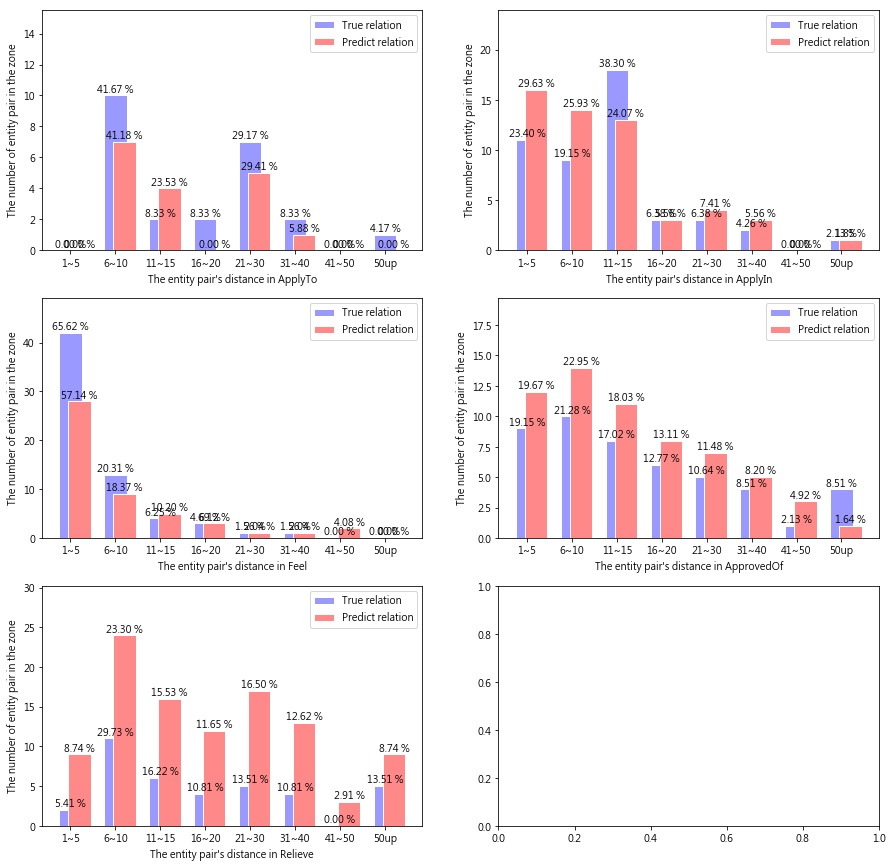

In [8]:
from models import JointERE
e_score, er_score = model.score(dev_loader, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.911 		 0.925 		 0.918 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.67 		 0.631 		 0.65 	
confusion matrix 
TP  	 fp  	 tn  	 fn
231 	 114 	 0 	 135 	

Relation error count: 69

Relation type 0
precision  	 recall  	 fbeta_score  	
0.545 		 0.450 		 0.493 	


Relation type 1
precision  	 recall  	 fbeta_score  	
0.629 		 0.733 		 0.677 	


Relation type 2
precision  	 recall  	 fbeta_score  	
0.733 		 0.592 		 0.655 	


Relation type 3
precision  	 recall  	 fbeta_score  	
0.692 		 0.679 		 0.686 	


Relation type 4
precision  	 recall  	 fbeta_score  	
0.663 		 0.670 		 0.667 	

{'11~15': 10, '16~20': 4, '31~40': 1, '1~5': 4, '6~10': 12, '50up': 0, '21~30': 8, '41~50': 1}
{'11~15': 8, '16~20': 0, '31~40': 1, '1~5': 4, '6~10': 7, '50up': 1, '21~30': 10, '41~50': 2}

{'11~15': 11, '16~20': 9, '31~40': 4, '1~5': 11, '6~10': 14, '50up': 0, '21~30': 8, '41~50': 2}
{'11~15': 10, '16~20': 10, '31~40': 3

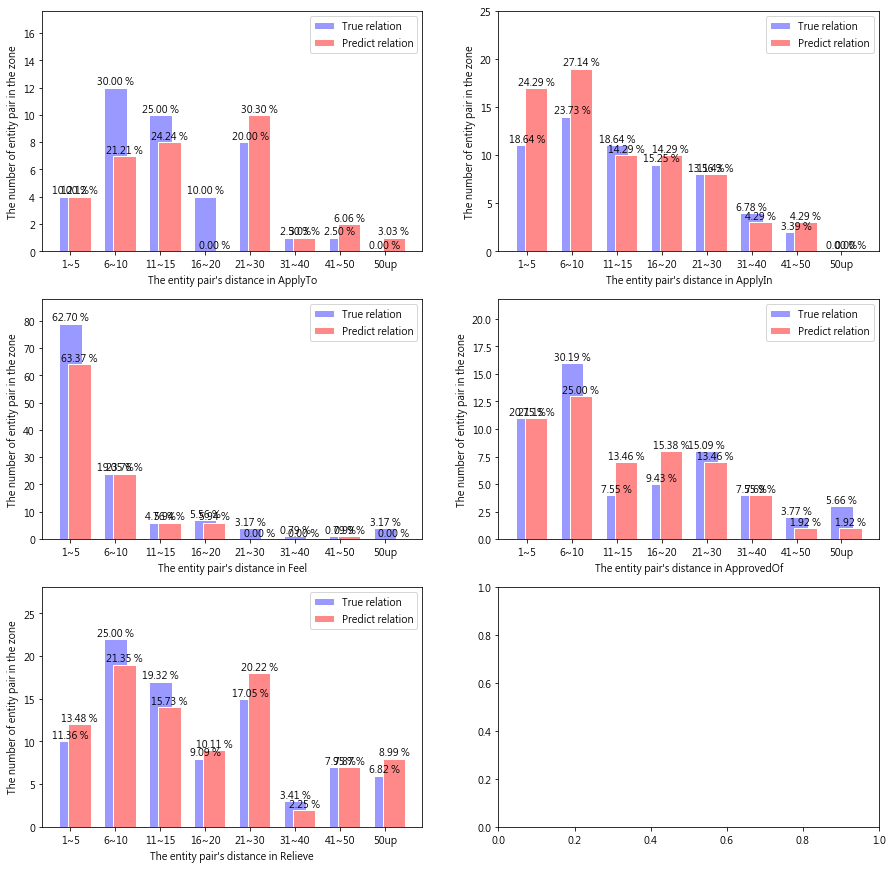

In [9]:
test_loader = BIOLoader(test_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered,
                        word_to_ix=loader.word_to_ix, device=use_device)

e_score, er_score = model.score(test_loader, silent=True, rel_detail=True, analyze=True)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['使', '用', '此', '款', '美', '髮', '油', '之', '後', ',', '頭', '髮', '觸', '感', '摸', '起', '來', '很', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 2), (12, 13, 5), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
predict
[(2, 3, 2), (12, 13, 5), (18, 19, 3)]
[((2, 3, 2), (18, 19, 3), 3)]
['保', '濕', '商', '品', '一', '向', '是', '我', '最', '最', '注', '重', '的', '臉', '部', '保', '養', '商', '品', '之', '一', ',', '因', '為', '屬', '於', '極', '敏', '感', '性', '且', '偏', '乾', '的', '膚', '質', 

['此', '款', '珂', '潤', '美', '白', '精', '華', '質', '地', '相', '當', '細', '緻', '好', '推', '勻', '.', '延', '展', '性', '很', '好']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', [], [], ['Feel-0-B'], ['Feel-0-B'], [], '', '', '', '', '', '']

True
[(0, 1, 2), (8, 9, 5), (12, 13, 4), (14, 16, 4)]
[((8, 9, 5), (12, 13, 4), 2), ((8, 9, 5), (14, 16, 4), 2)]
predict
[(0, 1, 2), (8, 9, 5), (12, 13, 4), (14, 16, 4)]
[]
['本', '產', '品', '強', '調', '“', '高', '保', '濕', '“', '

['這', '罐', '用', '起', '來', '保', '溼', '力', '感', '覺', '蠻', '好', '的', ',', '後', '續', '的', '妝', '很', '貼', ',', '也', '不', '會', '乾', '到', '脫', '皮']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (5, 6, 3)]
[((0, 1, 2), (5, 6, 3), 3)]
predict
[(0, 1, 2), (5, 6, 3)]
[((0, 1, 2), (5, 6, 3), 3)]
['用', '了', '本', '產', '品', '臉', '上', '的', '保', '濕', 

['待', '在', '冷', '氣', '房', '的', 'O', 'L', '都', '知', '道', '即', '使', '夏', '天', '油', '水', '更', '不', '平', '衡', '所', '以', '臉', '部', '的', '乾', '感', '會', '更', '明', '顯', ',', '油', '感', '也', '會', '更', '凸', '顯', ',', '用', '了', '這', 'S', 'U', 'R', 'P', 'U', 'R', '後', '混', '和', '肌', '的', 'T', '字', '油', '感', '與', '雙', '頰', '乾', '感', '舒', '緩', '很', '多', ',', '滿', '威', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['整', '體', '來', '說', ',', '這', '款', '卸', '妝', '水', '我', '滿', '喜', '歡', '的', ',', '卸', '妝', '效', '果', '不', '錯', ',', '沒', '有', '人', '工', '香', '精', ',', '邊', '卸', '妝', '還', '兼', '保', '濕', ',', '不', '過', ',', '控', '油', '方', '面', '對', '於', '我', '這', '個', '大', '油', '臉', '是', '沒', '什', '麼', '效', '果', '啦']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

['這', '瓶', '保', '濕', '霜', '很', '清', '爽']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
[[], [], '', '', '', '', [], []]

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
[[], [], '', '', '', '', [], []]

True
[(0, 1, 2), (6, 7, 4)]
[]
predict
[(0, 1, 2), (6, 7, 4)]
[]
['因', '我', '冬', '天', '的', '肌', '膚', '非', '常', '的', '乾', '燥', '所', '以', '冬', '天', '使', '用', '保', '濕', '度', '就', '真', '的', '很', '不', '夠']
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', [], [], [], '', '', '', '', '', '']

Predict output
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', [],

['剛', '收', '到', '這', '罐', '美', '白', '精', '華', '有', '驚', '嘆', '怎', '麼', '可', '以', '賣', '這', '麼', '貴', ',', '到', '底', '是', '有', '多', '有', '效', '果']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(3, 4, 2)]
[]
predict
[(3, 4, 2)]
[]
['超', '適', '合', '夏', '天', '美', '白', '用', ',', '以', '前', '夏', '天', '白', '天', '擦', '美', '白', '精', '華', '都', '怕', '會', '太', '滋', '潤', '太', '黏', '膩', ',', '所', '以', '都', '沒', '有', '認', '真', '美', '白', ',', '現', '在', '我', '終', '於', '可', '以', '在', '夏', '天

['我', '臉', '部', '是', '痘', '痘', '肌', ',', '所', '以', '對', '清', '潔', '面', '膜', '非', '常', '的', '喜', '歡', '使', '用', ',', '以', '往', '都', '是', '使', '用', '泥', '狀', '的', ',', '這', '次', '是', '收', '到', '凍', '膜', '狀', '的', '質', '地', ',', '有', '點', '懷', '疑', '可', '以', '深', '層', '清', '潔', '嘛']
['O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['這', '款', '粉', '餅', '很', '適', '合', '冬', '天', '使', '用', ',', '這', '幾', '天', '天', '氣', '真', '的', '很', '冷', ',', '一', '整', '天', '下', '來', '肌', '膚', '沒', '有', '出', '現', '乾', '燥', '浮', '粉', ',', '剛', '擦', '時', '看', '的', '出', '粉', '感', ',', '但', '出', '油', '之', '後', '妝', '更', '自', '然', '服', '貼']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['我', '有', '時', '懶', ',', '就', '只', '有', '單', '擦', '青', '春', '露', ',', '在', '夏', '天', '來', '說', ',', '保', '濕', '度', '還', '可', '以', '∼']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '']

True
[(15, 16, 1), (20, 22, 3)]
[((15, 16, 1), (20, 22, 3), 1)]
predict
[(15, 16, 1), (20, 22, 3)]
[((15, 16, 1), (20, 22, 3), 1)]
['這', '款', 'a', 'm', 'p', 'm', '+', 's', 'k', 

['但', '是', '我', '是', '覺', '得', '這', '款', '的', '保', '濕', '效', '果', '還', '是', '比', '較', '明', '顯']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '']

True
[(6, 7, 2), (9, 10, 3)]
[((6, 7, 2), (9, 10, 3), 3)]
predict
[(6, 7, 2), (9, 10, 3)]
[((6, 7, 2), (9, 10, 3), 3)]
['皮', '膚', '毛', '孔', '有', '細', '緻', '些', ',', '鼻', '頭', '粉', '刺', '用', '這', '瓶', '用', '來', '治', '蠻', '不', '錯', '的']
['O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O

['整', '體', '來', '說', '我', '還', '滿', '喜', '歡', '這', '個', '產', '品', '的', ',', '真', '的', '不', '會', '刺', '激', '肌', '膚', ',', '又', '很', '保', '濕']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(9, 12, 2), (26, 27, 3)]
[((9, 12, 2), (26, 27, 3), 3)]
predict
[(9, 12, 2),

['此', '款', '產', '品', '用', '起', '來', ',', '並', '不', '是', '特', '別', '的', '清', '爽', ',', '不', '知', '道', '是', '不', '是', '因', '為', '我', '的', '皮', '膚', '比', '較', '容', '易', '出', '油', '的', '關', '係', ',', '覺', '得', '擦', '在', '臉', '上', '並', '沒', '有', '很', '清', '爽', ',', '反', '而', '有', '點', '黏', '膩', '的', '感', '覺', ',', '也', '覺', '得', '沒', '有', '很', '好', '吸', '收']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [],

['這', '款', '《', 'H', 'a', 'd', 'a', '-', 'L', 'a', 'b', 'o', '肌', '研', '玻', '尿', '酸', '保', '濕', '防', '曬', '凝', '露', '》', '整', '體', '來', '說', '是', '款', '很', '棒', '的', '防', '曬', '品']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['總', '結', '就', '是', '.', '我', '覺', '得', '對', '乾', '肌', '來', '說', '.', '.', '保', '濕', '

['不', '過', '這', '瓶', '是', '我', '用', '過', '讓', '後', '續', '保', '養', '吸', '收', '的', '最', '順', '利', '的', '一', '瓶']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 3, 2)]
[]
predict
[(2, 3, 2)]
[]
['按', '壓', '出', '來', '的', '質', '地', '是', '乳', '白', '色', '的', '乳', '液', '狀', ',', '不', '偏', '濃', '不', '偏', '淡']
['O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'O']
['', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', [], '', '', '']

Predict output
['

['還', '蠻', '放', '鬆', '的', '清', '香', '味', '道']
['O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-A'], ['Feel-0-A']]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', [], [], [], []]

True
[(5, 6, 4), (7, 8, 5)]
[((5, 6, 4), (7, 8, 5), 2)]
predict
[(5, 6, 4), (7, 8, 5)]
[]
['艾', '草', '能', '舒', '緩', '因', '乾', '燥', '所', '引', '起', '的', '皮', '膚', '癢', ',', '所', '以', '在', '這', '個', '乾', '冷', '的', '冬', '天', '試', '用', ',', '應', '該', '是', '滿', '好', '的', '時', '機']
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O'

['我', '最', '怕', '肌', '膚', '乾', '細', '紋', '會', '加', '深', '.', '.', '.', '在', '試', '用', '這', '瓶', '前', '就', '有', '這', '個', '困', '擾', ',']
['O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], [], ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '']

True
[(3, 5, 6), (6, 7, 0), (17, 18, 2)]
[]
predict
[(3, 5, 6), (6, 7, 0), (17, 18, 2)]
[((6, 7, 0), (17, 18, 2), 4)]
['重', '點', '是', '以', '往', '用', 'M', 'A', 'Y', 'B', 'E', 'L', 'L', 'I', 'N', 'E', '的', '產', '品', '跟', '我', '的', '膚', '

['吸', '收', '粉', '快', '.', '.', '質', '地', '也', '很', '輕', '爽', '.', '適', '合', '夏', '季', '使', '用', '但', '冬', '季', '時', '可', '能', '會', '不', '夠', '保', '濕', '對', '於', '常', '在', '冷', '氣', '房', '的', '美', '女', '來', '說', '.', '應', '是', '不', '錯', '的', '保', '養', '品', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', [], [], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', [], [], '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 

['質', '地', '清', '爽', '不', '黏', '膩']
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', [], []]

Predict output
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-1-B'], ['Feel-1-B']]

True
[(0, 1, 5), (2, 3, 4), (5, 6, 4)]
[((0, 1, 5), (2, 3, 4), 2)]
predict
[(0, 1, 5), (2, 3, 4), (5, 6, 4)]
[((0, 1, 5), (2, 3, 4), 2), ((0, 1, 5), (5, 6, 4), 2)]
Batch entity score
precision  	 recall  	 fbeta_score  	
(0.9767441860465116, 0.9333333333333333, 0.9545454545454545, None)

Batch relation score
precision  	 recall  	 fbeta_score  	
(0.34782608695652173, 0.47058823529411764, 0.39999999999999997, None)

p_r_fscore
precision  	 recall  	 fbeta_score  	
(0.347826086805293, 0.470588235017301, 0.39999999491250005) 8 15 0 9
['白', ',', '白', ',', '白', '.', '夏', '天', '就', '是', '要', '白', ',', '才', '會', '漂', '亮', '.', '今', 

['這', '款', '化', '妝', '水', '像', '水', '一', '樣', '清', '爽', ',', '但', '是', '卻', '很', '保', '濕']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', [], [], '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', [], [], '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(0, 4, 2), (9, 10, 4), (16, 17, 3)]
[((0, 4, 2), (16, 17, 3), 3)]
predict
[(0, 4, 2), (9, 10, 4), (16, 17, 3)]
[((0, 4, 2), (16, 17, 3), 3)]
['它', '使', '用', '完', '後', '很', '保', '濕', ',', '因', '為', '試', '用', '這', '款', '精', '華', '膜', '我', '幾', '乎

['•', '保', '濕', '精', '華', ',', '滑', '順', '水', '潤', '觸', '感']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], [], [], [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], [], [], [], []]

True
[(6, 7, 4), (8, 9, 4), (10, 11, 5)]
[]
predict
[(6, 7, 4), (8, 9, 4), (10, 11, 5)]
[]
['這', '瓶', '綠', '色', '包', '裝', ',', '裡', '頭', '有', '添', '加', '和', '漢', '植', '物', '成', '份', ',', '使', '用', '起', '來', '有', '收', '斂', '粗', '大', '毛', '孔', '的', 'F', 'U', ',']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-

['這', '款', '機', '能', '調', '理', '液', '瓶', '身', '還', '滿', '有', '質', '感', '的', '它', '的', '氣', '味', '我', '不', '是', '很', '喜', '歡', '覺', '得', '有', '點', '淡', '淡', '的', '綠', '油', '精', '的', '味', '道', '但', '是', '實', '用', '性', '比', '較', '重', '要', '使', '用', '之', '後', '控', '油', '的', '效', '果', '不', '錯', '而', '且', '又', '不', '會', '讓', '肌', '膚', '乾', '燥', '上', '妝', '後', '也', '比', '較', '不', '會', '浮', '粉', '或', '粉', '刺', '冒', '出', '的', '情', '形', '價', '格', '實', '惠', '整', '體', '而', '言', '是', '不', '錯', '的']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['一', '直', '就', '得', '那', '個', '味', '道', '很', '嗆', '雖', '然', '它', '敷', '起', '來', '冰', '冰', '涼', '涼', '的', '夏', '天', '很', '舒', '服']
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', [], [], '', [], '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

True
[(6, 7, 5), (9, 9, 4), (21, 22, 1)]
[((6, 7, 5), (9, 9, 4), 2)]
predict
[(6, 7, 5), (9, 9, 4), (21, 22, 1)]
[]
['重', '點', '是', '很', '擔', '心', '痘', '痘', '臉', '蛋', '適', '不', '適', '合', '用', '這', '款', '美', '容', '油', '嘛', '∼', '∼', '∼']
['O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O

['所', '以', '如', '果', '喜', '歡', '粉', '餅', '系', '的', '水', '水', ',', '或', '是', '容', '易', '出', '油', '的', '人', ',', '這', '款', '真', '的', '不', '錯', ',', '而', '且', '夏', '天', '使', '用', '會', '更', '有', '感', '覺', ',', '因', '為', '它', '有', '控', '油', '的', '效', '果']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-

['這', '瓶', '還', '蠻', '適', '合', '乾', '肌', '的', '人', '使', '用', ',', '夠', '保', '濕', '哦']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O']
[[], [], '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2), (6, 7, 6), (14, 15, 3)]
[((6, 7, 6), (14, 15, 3), 0)]
predict
[(0, 1, 2), (6, 7, 6), (14, 15, 3)]
[]
['她', '的', '保', '濕', '程', '度', '讓', '我', '有', '點', '吃', '驚', ',', '尤', '其', '在', '冬', '天', ',', '只', '要', '一', '上', '妝', ',', '眼', '周', '跟', '嘴', '角', '容', '易', '有', '裂', '紋', '的', '情', '況', ',']
['O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O'

[(0, 1, 2), (11, 12, 5), (16, 17, 4), (61, 61, 4)]
[((11, 12, 5), (16, 17, 4), 2)]
['這', '款', 'B', 'l', 'i', 's', 't', 'e', 'x', '碧', '唇', '高', ',', '保', '濕', '潤', '色', '護', '唇', '膏', ',', '有', '附', '一', '個', '小', '鏡', '子', '可', '以', '使', '用', ',', '但', '太', '小', '了', '我', '看', '不', '習', '慣', ',', '還', '是', '比', '較', '喜', '慣', '用', '手', '機', '相', '機', '看']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

['因', '為', '強', '調', '5', '0', '%', '的', '保', '濕', '成', '分', ';', '5', '0', '%', '的', '乳', '霜', ',', '所', '以', '我', '在', '化', '妝', '水', '、', '緊', '實', '精', '華', '後', ',', '省', '略', '了', '保', '濕', '步', '驟', ',', '直', '接', '接', '上', '這', '罐', '乳', '霜']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 

['很', '喜', '歡', '本', '產', '品', '清', '爽', '不', '黏', '膩', '的', '感', '覺', '很', '適', '合', '敏', '感', '性', '膚', '質', '的', '我', '對', '兩', '頰', '的', '保', '濕', '效', '果', '很', '好', '但', '對', '於', '原', '本', '鼻', '子', '兩', '側', '乾', '癢', '的', '狀', '況', '及', '消', '除', '細', '紋', '並', '無', '太', '大', '改', '善', '整', '體', '來', '說', '是', '個', '保', '濕', '性', '良', '好', '的', '產', '品']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], [], [], '', [], [], '', '', '', '', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '

['這', '款', '保', '濕', '效', '果', '真', '的', '不', '錯', '喔']
['B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '']

True
[(0, 1, 2), (2, 3, 3)]
[((0, 1, 2), (2, 3, 3), 3)]
predict
[(0, 1, 2), (2, 3, 3)]
[((0, 1, 2), (2, 3, 3), 3)]
['整', '體', '來', '說', '我', '覺', '得', '以', '秋', '天', '來', '說', '是', '還', '算', '不', '錯', '的', '保', '濕', '產', '品', '喔']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O'

['對', '於', '我', '這', '種', '乾', '性', '肌', '膚', '這', '款', '的', '保', '濕', '度', '真', '的', '很', '不', '錯', '~']
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

True
[(5, 8, 6), (9, 10, 2), (12, 14, 3)]
[]
predict
[(5, 8, 6), (9, 10, 2), (12, 14, 3)]
[]
['面', '膜', '精', '華', '液', '質', '地', '非', '常', '清', '爽', ',', '沒', '有', '明', '顯', '香', '味', ',', '精', '華', '液', '質', '地', '保', '濕', '滑', '順', '容', '易', '吸', '收', ',', '敷', '上', '後', '完', '全', '不', '會', '刺', '激

['皮', '膚', '的', '保', '濕', '度', '維', '持', '的', '還', '不', '錯', ',', '不', '會', '因', '為', '夏', '天', '用', '控', '油', '型', '的', '彩', '妝', '品', '而', '覺', '得', '臉', '乾']
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B', 'ApplyIn-1-B'], ['ApplyIn-0-B', 'ApplyIn-1-B'], '', ['ApplyIn-1-A'], ['ApplyIn-1-A'], '', '', '', '', '', '', '', '', '', '

['但', '是', '它', '的', '缺', '點', '是', ':', '顏', '色', '擦', '了', '不', '自', '然', ',', '太', '白', '了', ',', '遮', '瑕', '力', '不', '夠', '好', ',', '像', '我', '使', '用', '的', '這', '幾', '天', '長', '了', '痘', '痘', ',', '如', '果', '光', '用', '這', '瓶', '遮', '的', '話', '就', '會', '不', '夠', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP',

['因', '為', '一', '般', '來', '說', '美', '白', '乳', '液', '通', '常', '保', '濕', '力', '比', '較', '不', '那', '麼', '強', ',', '但', '這', '款', '我', '覺', '得', '很', '適', '合', '夏', '天', '使', '用', '的', '乳', '液']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', [], [], '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', [], [], '', '', '', '', '']

True
[(23, 24, 2), (31, 32, 1)]
[]
predict
[(23, 24, 2), (31, 32

['香', '味', '清', '淡', ',', '使', '用', '起', '來', '很', '水', '潤', ',', '又', '不', '黏', '膩', ',', '比', '一', '般', '保', '濕', '化', '妝', '水', '保', '濕', ',', '卻', '又', '不', '會', '使', '皮', '膚', '出', '油', ',', '很', '好', '用']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '']

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', '', '', '',

['這', '款', '保', '濕', '精', '華', '乳', '液', '非', '常', '推', '薦', '給', '很', '會', '出', '油', '的', '水', '水']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '']

True
[(0, 1, 2), (15, 16, 0)]
[]
predict
[(0, 1, 2), (15, 16, 0)]
[((0, 1, 2), (15, 16, 0), 4)]
['這', '瓶', '倒', '是', '不', '錯', '~', '臉', '上', '的', '出', '油', '還', '好', '(', '但', '還', '是', '要', '吸', '油', '一', '下', ')']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', '', '',

['這', '款', '眼', '線', '膠', '好', '描', '繪', ',', '快', '乾', ',', '眨', '眼', '時', '也', '不', '會', '沾', '到', '眼', '窩', ',', '碰', '到', '眼', '睛', '出', '油', '後', '也', '不', '會', '暈', '開', '一', '直', '保', '持', '著', '剛', '上', '時', '的', '樣', '子', '真', '是', '太', '棒', '了']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['臉', '的', '光', '澤', '很', '好', ',', '彈', '力', '也', '不', '錯', ',', '而', '且', '即', '將', '邁', '入', '冬', '季', '的', '氣', '溫', ',', '已', '經', '需', '要', '做', '多', '一', '些', '滋', '潤', '臉', '部', '的', '保', '養', '手', '續']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['混', '合', '性', '膚', '質', '的', '我', '洗', '完', '很', '保', '濕', '清', '爽', '不', '油', '膩']
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], [], [], '', '', '']

Predict output
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], [], [], '', '', '']

True
[(0, 4, 6), (10, 11, 3), (12, 13, 4)]
[((0, 4, 6), (10, 11, 3), 0)]
predict
[(0, 4, 6), (10, 11, 3), (12, 13, 4)]
[((0, 4, 6), (10, 11, 3), 0)]
['不', '會', '像', '有', '些', '精', '華', '液', '保', '濕', '度', '不', '夠', ',', '用', '了', '還', '會', '脫', '皮', '長', '屑', '屑', ',']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD',

['', '', '', '', [], [], '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '']

Predict output
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O']
['', '', '', '', [], [], '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '']

True
[(4, 5, 1), (8, 9, 0), (29, 30, 2)]
[]
predict
[(4, 5, 1), (8, 9, 0), (29, 30, 2)]
[((8, 9, 0), (29, 30, 2), 4)]
['雖', '然', '稱', '是', '化', '妝', '水', ',', '但', '是', '質', '地', '是', '有', '點', '水', '乳', '狀', ',', '是', '完', '全', '透', '明', '狀']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', ['Feel-

['這', '個', '產', '品', '是', '凝', '露', '型', '態', '的', '保', '濕', '產', '品', ',', '標', '榜', '適', '用', '於', '所', '有', '膚', '質', ',']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 3, 2)]
[]
predict
[(0, 3, 2)]
[]
['使', '用', '這', '款', '卸', '妝', '乳', '時', '沒', '有', '刺', '激', '感', ',', '蠻', '溫', '和', '的', ',', '試', '用', '期', '間', '也', '沒', '出', '現', '過', '敏', '現', '象', '或', '長', '痘', '痘', '情', '形']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['此', '款', '的', '保', '濕', '舒', '服', '度', '倒', '是', '沒', '有', '很', '大', '效', '果', '喔', ',', '畢', '竟', '它', '本', '身', '比', '較', '強', '調', '美', '白', '淡', '斑', '等', '其', '他', '效', '果', '吧', ':', ')']
['B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A', 'ApprovedOf-1-A'], ['ApprovedOf-0-A', 'ApprovedOf-1-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

['味', '道', '很', '天', '然', ';', '無', '添', '加', '的', '很', '清', '新', '自', '然', ',', '聞', '起', '來', '很', '舒', '服', ';', '不', '刺', '鼻']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 5), (11, 12, 4)]
[((0, 1, 5), (11, 12, 4), 2)]
predict
[(0, 1, 5), (11, 12, 4)]
[((0, 1, 5), (11, 12, 4), 2)]
['此', '款', '防', '曬', '保', '濕', '水', '凝', '霜', '使', '用', '上', '很', '容', '易', '推', '均']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 

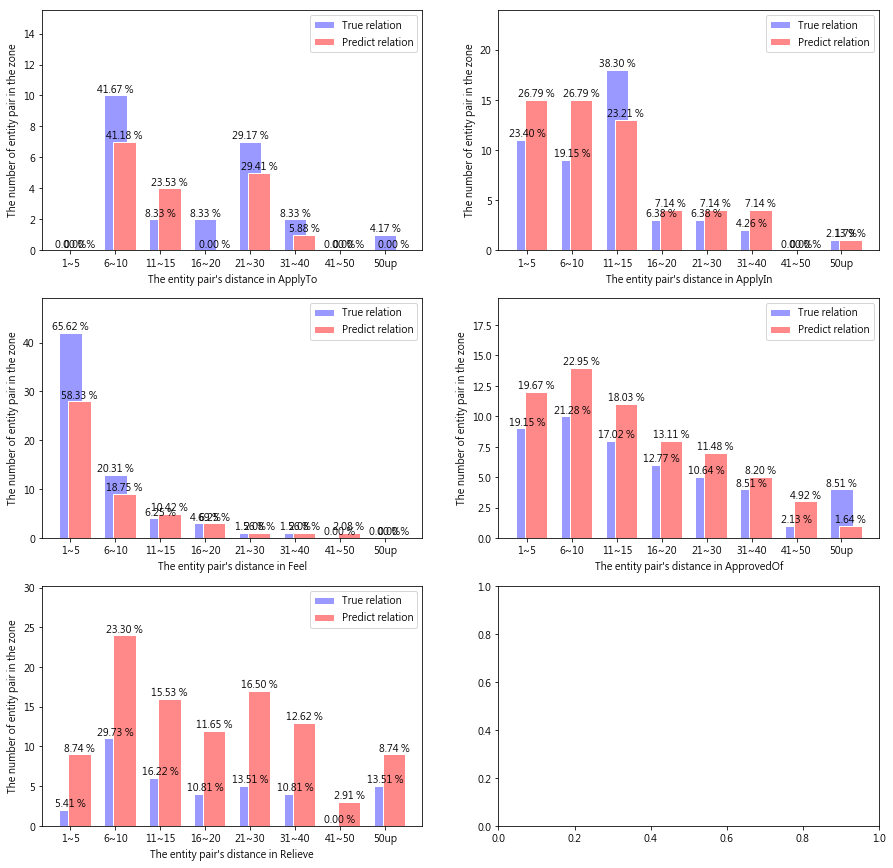

In [10]:
e_score, er_score = model.score(dev_loader, isTrueEnt=True, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.910 		 0.926 		 0.918 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.673 		 0.628 		 0.65 	
confusion matrix 
TP  	 fp  	 tn  	 fn
230 	 112 	 0 	 136 	

Relation error count: 70

Relation type 0
precision  	 recall  	 fbeta_score  	
0.545 		 0.450 		 0.493 	


Relation type 1
precision  	 recall  	 fbeta_score  	
0.629 		 0.733 		 0.677 	


Relation type 2
precision  	 recall  	 fbeta_score  	
0.747 		 0.592 		 0.661 	


Relation type 3
precision  	 recall  	 fbeta_score  	
0.692 		 0.679 		 0.686 	


Relation type 4
precision  	 recall  	 fbeta_score  	
0.659 		 0.659 		 0.659 	

{'11~15': 10, '16~20': 4, '31~40': 1, '1~5': 4, '6~10': 12, '50up': 0, '21~30': 8, '41~50': 1}
{'11~15': 8, '16~20': 0, '31~40': 1, '1~5': 4, '6~10': 7, '50up': 1, '21~30': 10, '41~50': 2}

{'11~15': 11, '16~20': 9, '31~40': 4, '1~5': 11, '6~10': 14, '50up': 0, '21~30': 8, '41~50': 2}
{'11~15': 10, '16~20': 10, '31~40': 

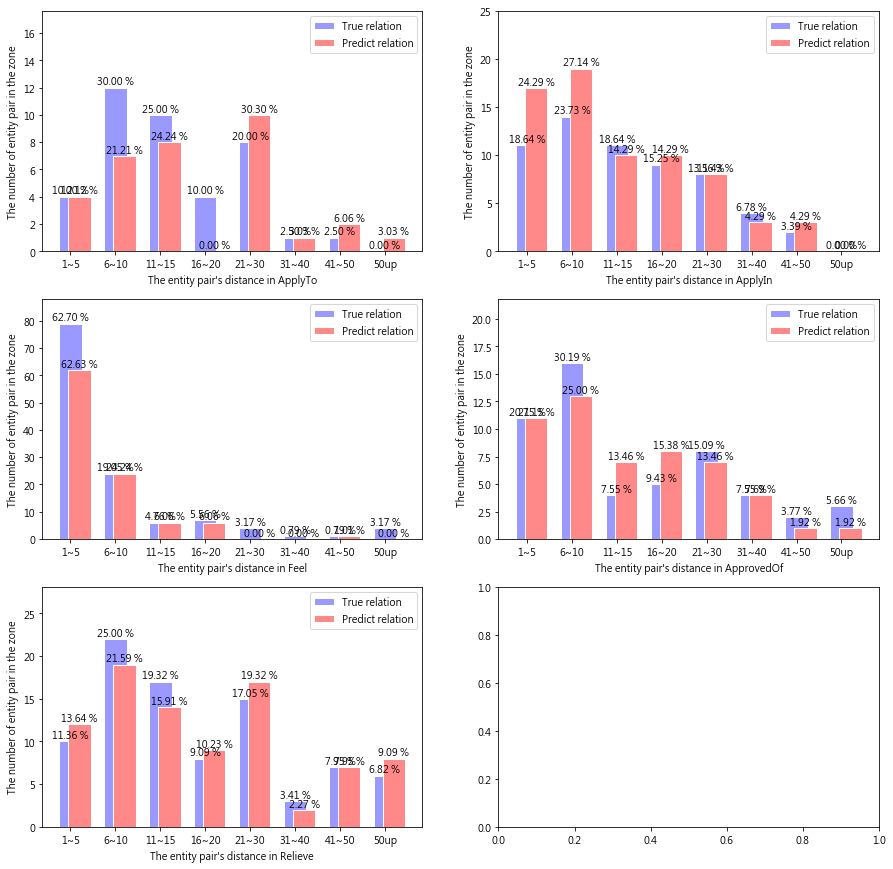

In [11]:
e_score, er_score = model.score(test_loader, isTrueEnt=True, silent=True, rel_detail=True, analyze=True)